##Uploading and reading the data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving term-deposit-marketing-2020.csv to term-deposit-marketing-2020.csv


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("term-deposit-marketing-2020.csv")

##Replacing 'unknown' values with NaN

In [3]:
unknown_replacement = np.nan
data.replace("unknown", unknown_replacement, inplace=True)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,no


## Addressing missing values

In [4]:
# replacing missing values with most frequent value
column_name1 = "job"
mode_value1 = data["job"].mode().iloc[0]
data[column_name1].fillna(mode_value1, inplace=True)

column_name2 = "education"
mode_value2 = data["education"].mode().iloc[0]
data[column_name2].fillna(mode_value2, inplace=True)

# dropping "contact" feature
data = data.drop(["contact"], axis=1)

data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,no


## One-hot encoding
to transform categorical values into binary values

In [5]:
# one-hot encoding data using get_dummies
encoded_data = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month'])

# mapping dictionary for encoding 'yes' and 'no' to 1 and 0
mapping = {'yes': 1, 'no': 0}

# apply mapping to the specified features
features_to_encode = ['y']

encoded_data[features_to_encode] = encoded_data[features_to_encode].replace(mapping)

target = 'y'

encoded_data.head()

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,5,76,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,5,92,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,5,198,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Scaling the data
using StandardScaler

In [6]:
# satndardizing the dataset
from sklearn.preprocessing import StandardScaler

# list of features to standardize
features_to_standardize = ['age', 'balance', 'day', 'duration', 'campaign']

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the specified features
encoded_data[features_to_standardize] = scaler.fit_transform(encoded_data[features_to_standardize])

encoded_data.head()

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,1.810415,0.299174,-1.3309,0.023811,-0.581096,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.358382,-0.428854,-1.3309,-0.400305,-0.581096,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.782501,-0.438152,-1.3309,-0.689474,-0.581096,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.669532,0.079802,-1.3309,-0.627785,-0.581096,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.782501,-0.438497,-1.3309,-0.219092,-0.581096,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Testing, training, splitting the data

In [7]:
from sklearn.model_selection import train_test_split

X = encoded_data.drop(["y"], axis=1)
y = encoded_data["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

## Balancing data

###Oversampling

###Undersampling

### Undersampling from scratch

In [10]:
# length of minority class (y=1)
minority_len = len(encoded_data[encoded_data['y']==1])
print(minority_len)

2896


In [11]:
majority_indices = encoded_data[encoded_data['y'] == 0].index
print(majority_indices)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            39985, 39987, 39989, 39991, 39992, 39993, 39994, 39995, 39998,
            39999],
           dtype='int64', length=37104)


In [12]:
np.random.seed(42)
random_majority_indices = np.random.choice(majority_indices, minority_len, replace=False)
print(len(random_majority_indices))

2896


In [13]:
minority_indices = encoded_data[encoded_data['y'] == 1].index
print(minority_indices)

Int64Index([   83,    86,    87,   129,   168,   270,   388,   390,   446,
              457,
            ...
            39976, 39978, 39979, 39982, 39984, 39986, 39988, 39990, 39996,
            39997],
           dtype='int64', length=2896)


In [14]:
import seaborn as sns
under_sample_indices = np.concatenate([minority_indices, random_majority_indices])

under_sample = encoded_data.loc[under_sample_indices]


<Axes: xlabel='y', ylabel='count'>

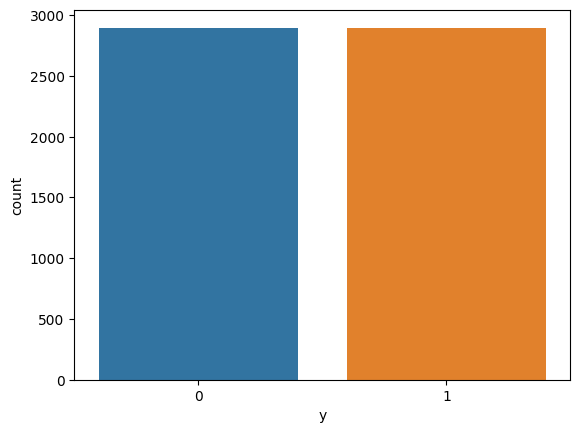

In [15]:

sns.countplot(x=target, data=under_sample)

In [16]:
X = under_sample.loc[:, encoded_data.columns!=target]
Y = under_sample.loc[:, encoded_data.columns==target]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42
)

## Models

### Random Forest Classifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

rf_classifier= RandomForestClassifier(criterion='entropy', random_state=42)
rf_classifier.fit(X_train, Y_train)

# predicting the test set result

Y_pred_rf= rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)

F1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
print("F1: ",F1_rf)
print("Accuracy: ",accuracy_rf)

F1:  0.8575180564674985
Accuracy:  0.8501381215469613


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, Y_train)

Y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)

F1_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt)
print("F1: ",F1_dt)
print("Accuracy: ",accuracy_dt)

F1:  0.8144675150703281
Accuracy:  0.8087016574585635


###Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, Y_train)

Y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
precision_lr = precision_score(Y_test, Y_pred_lr)
recall_lr = recall_score(Y_test, Y_pred_lr)

F1_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)
print("F1: ",F1_lr)
print("Accuracy: ",accuracy_lr)

F1:  0.8333333333333334
Accuracy:  0.830110497237569


### XGBoost
code from [Machine Learning Mastery](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
predictions = [round(value) for value in Y_pred_xgb]

accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
precision_xgb = precision_score(Y_test, Y_pred_xgb)
recall_xgb = recall_score(Y_test, Y_pred_xgb)

F1_xgb = 2 * (precision_xgb * recall_xgb) / (precision_xgb + recall_xgb)
print("F1: ",F1_xgb)
print("Accuracy: ",accuracy_xgb)

F1:  0.8586456278763971
Accuracy:  0.8515193370165746


###k-Nearest Neighbors
code from [Real Python](https://realpython.com/knn-python/)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

Y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)

F1_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)
print("F1: ",F1_knn)
print("Accuracy: ",accuracy_knn)

F1:  0.8304969366916269
Accuracy:  0.8280386740331491


###SVM (Support Vector Machine)

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, Y_train)

Y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
precision_svm = precision_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)

F1_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)
print("F1: ",F1_svm)
print("Accuracy: ",accuracy_svm)

F1:  0.8474132285527177
Accuracy:  0.8390883977900553


##Hyperparameter Tuning
(Random Forest, XGBoost, SVM)

###H.T. Random Forest

In [ ]:
# check parameters in use
from pprint import pprint
print("Parameters in use:\n")
pprint(rf_classifier.get_params())

####RandomizedSearchCV

In [ ]:
# create random grid
from sklearn.model_selection import RandomizedSearchCV  # performs a randomized search over a specified parameter grid to find the best combination of hyperparameters for a machine learning model.

# number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]  # contains 10 integers, evenly spaced between 200 and 2000

# strategies used to determine the maximum number of features considered for splitting a node in a decision tree
max_features = ['auto', 'sqrt']  # 'auto' indicates using all features, 'sqrt' indicates using the square root of the total number of features

# maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]  # list containing 11 integers, evenly spaced between 10 and 110
max_depth.append(None)  # trees can grow without any maximum depth limit

# minimum number of samples required to split an internal node in a decision tree
min_samples_split = [2, 5, 10]

# minimum number of samples required to be at a leaf node in a decision tree
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training each tree // indicates whether bootstrap samples should be used when building trees
bootstrap = [True, False]  # Bootstrapping involves random sampling with replacement from the training dataset

# random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# finding best parameters using random grid

# create the base model to tune
rf = RandomForestClassifier()
# random search of parameters, using 5 fold cross validation
# 100 different combinations of hyperparameters will be tried during the search
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# fit the random search model to data
rf_random.fit(X_train, Y_train)

rf_random.best_params_

#####Compare base model with tuned model

In [ ]:
# compare base model with best random search model
from sklearn.metrics import f1_score

rf_tuned_RS = RandomForestClassifier(criterion='entropy', random_state=42, n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=40, bootstrap=False)
rf_tuned_RS.fit(X_train, Y_train)

Y_pred_rf_tuned_RS= rf_tuned_RS.predict(X_test)

# Calculate the evaluation metrics for both models
accuracy_tuned_rf_RS = accuracy_score(Y_test, Y_pred_rf_tuned_RS)
f1_tuned_rf_RS = f1_score(Y_test, Y_pred_rf_tuned_RS)

accuracy_baseline_rf_RS = accuracy_score(Y_test, Y_pred_rf)
f1_baseline_rf_RS = f1_score(Y_test, Y_pred_rf)

# Print the evaluation metrics for both models
print("Tuned Model Metrics for Random Forest:")
print(f"Accuracy: {accuracy_tuned_rf_RS}")
print(f"F1-score: {f1_tuned_rf_RS}")

print("\nBaseline Model Metrics for Random Forest:")
print(f"Accuracy: {accuracy_baseline_rf_RS}")
print(f"F1-score: {f1_baseline_rf_RS}")

# calculate percentage improvement
percentage_improvement_rf_RS = ((f1_tuned_rf_RS - f1_baseline_rf_RS) / f1_baseline_rf_RS) * 100

print(f"\nPercentage Improvement of Tuned Model over Baseline Model: {percentage_improvement_rf_RS:.2f}%")

Tuned Model Metrics for Random Forest:
Accuracy: 0.8515193370165746
F1-score: 0.8599348534201955

Baseline Model Metrics for Random Forest:
Accuracy: 0.8501381215469613
F1-score: 0.8575180564674985

Percentage Improvement of Tuned Model over Baseline Model: 0.28%


####GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# number of trees
n_estimators = [200, 600, 1000, 1400, 1800, 2100]  # contains 10 integers, evenly spaced between 200 and 2000

# strategies used to determine the maximum number of features considered for splitting a node in a decision tree
max_features = ['auto', 'sqrt']  # 'auto' indicates using all features, 'sqrt' indicates using the square root of the total number of features

# maximum number of levels in a tree
max_depth = [10, 30, 50, 70, 90, 110]  # list containing 11 integers, evenly spaced between 10 and 110
max_depth.append(None)  # trees can grow without any maximum depth limit

# minimum number of samples required to split an internal node in a decision tree
min_samples_split = [2, 5, 10]

# minimum number of samples required to be at a leaf node in a decision tree
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training each tree // indicates whether bootstrap samples should be used when building trees
bootstrap = [True, False]  # Bootstrapping involves random sampling with replacement from the training dataset

random_state = [42]

# random grid
param_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state,
               'bootstrap': bootstrap}
pprint(param_grid_rf)

{'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 70, 90, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 600, 1000, 1400, 1800, 2100],
 'random_state': [42]}


In [ ]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1')

grid_search.fit(X_train, Y_train)

print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

#####Compare base model with tuned model

In [ ]:
from sklearn.metrics import f1_score
rf_tuned = RandomForestClassifier(bootstrap=False, max_depth=110, max_features='auto', min_samples_leaf=1, min_samples_split=10, n_estimators=1000, criterion='entropy', random_state=42)
rf_tuned.fit(X_train, Y_train)

Y_pred_rf_tuned = rf_tuned.predict(X_test)

# calculate accuracy and f1 for both models
accuracy_tuned_rf = accuracy_score(Y_test, Y_pred_rf_tuned)
f1_tuned_rf = f1_score(Y_test, Y_pred_rf_tuned)

accuracy_baseline_rf = accuracy_score(Y_test, Y_pred_rf)
f1_baseline_rf = f1_score(Y_test, Y_pred_rf)

# print evaluation metrics for both models
print("Tuned Model Metrics for Random Forest:")
print(f"Accuracy: {accuracy_tuned_rf}")
print(f"F1-score: {f1_tuned_rf}")

print("\nBaseline Model Metrics for Random Forest:")
print(f"Accuracy: {accuracy_baseline_rf}")
print(f"F1-score: {f1_baseline_rf}")

# calculate percentage improvement
percentage_improvement_rf = ((f1_tuned_rf - f1_baseline_rf) / f1_baseline_rf) * 100

print(f"\nPercentage Improvement of Tuned Model over Baseline Model: {percentage_improvement_rf:.2f}%")

Tuned Model Metrics for Random Forest:
Accuracy: 0.8515193370165746
F1-score: 0.8597521200260926

Baseline Model Metrics for Random Forest:
Accuracy: 0.8501381215469613
F1-score: 0.8575180564674985

Percentage Improvement of Tuned Model over Baseline Model: 0.26%


###H.T. XGBoost

In [ ]:
# check parameters in use
from pprint import pprint
print("Parameters in use:\n")
pprint(xgb_model.get_params())

In [ ]:
# create random grid
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
max_depth = [3, 5, 7]
learning_rate = [0.1, 0.001, 0.0001]
subsample = [0.5, 0.7, 1]
random_state = [42]

param_grid_xgb = {'n_estimators': n_estimators,
               'random_state': random_state,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'subsample': subsample}
pprint(param_grid_xgb)

{'learning_rate': [0.1, 0.001, 0.0001],
 'max_depth': [3, 5, 7],
 'n_estimators': [200, 650, 1100, 1550, 2000],
 'random_state': [42],
 'subsample': [0.5, 0.7, 1]}


In [ ]:
# finding best parameters using random grid

# create the base model to tune
xgb = XGBClassifier()
# random search of parameters, using 5 fold cross validation
# 100 different combinations of hyperparameters will be tried during the search
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='f1')
# fit the random search model to data
grid_search_xgb.fit(X_train, Y_train)

print("Best set of hyperparameters: ", grid_search_xgb.best_params_)
print("Best score: ", grid_search_xgb.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'random_state': 42, 'subsample': 1}
Best score:  0.8772318846435843


#### Compare base model with tuned model

In [ ]:
# compare base model with best random search model
from sklearn.metrics import f1_score

xgb_tuned = XGBClassifier(random_state=42, subsample=1, n_estimators=200, max_depth=7, learning_rate=0.1)
xgb_tuned.fit(X_train, Y_train)

Y_pred_xgb_tuned= xgb_tuned.predict(X_test)

# Calculate the evaluation metrics for both models
accuracy_xgb_tuned = accuracy_score(Y_test, Y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(Y_test, Y_pred_xgb_tuned)

accuracy_xgb_baseline = accuracy_score(Y_test, Y_pred_xgb)
f1_xgb_baseline = f1_score(Y_test, Y_pred_xgb)

# Print the evaluation metrics for both models
print("Tuned Model Metrics for XGBoost:")
print(f"Accuracy: {accuracy_xgb_tuned}")
print(f"F1-score: {f1_xgb_tuned}")

print("\nBaseline Model Metrics for XGBoost:")
print(f"Accuracy: {accuracy_xgb_baseline}")
print(f"F1-score: {f1_xgb_baseline}")

# calculate percentage improvement
percentage_improvement_xgb = ((f1_xgb_tuned - f1_xgb_baseline) / f1_xgb_baseline) * 100

print(f"\nPercentage Improvement of Tuned Model over Baseline Model: {percentage_improvement_xgb:.2f}%")

Tuned Model Metrics for XGBoost:
Accuracy: 0.8570441988950276
F1-score: 0.8640840446487197

Baseline Model Metrics for XGBoost:
Accuracy: 0.8515193370165746
F1-score: 0.8586456278763971

Percentage Improvement of Tuned Model over Baseline Model: 0.63%


###H.T. SVM

In [ ]:
# check parameters in use
from pprint import pprint
print("Parameters in use:\n")
pprint(svm_model.get_params())

Parameters in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [ ]:
from sklearn.model_selection import GridSearchCV

# regularization. Tells the SVM optimisation how much error is bearable.
C = [0.1, 1.0, 10.0, 100.0] # when C is high it will classify all the data points correctly, also there is a chance to overfit

# defines how far influences the calculation of plausible line of separation
gamma = [1.0, 0.1, 0.01, 0.001, 'scale']  # when gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.

#
kernel = ['rbf', 'poly', 'sigmoid']

random_state = [42]

# random grid
param_grid_svm = {'C': C,
                  'gamma': gamma,
                  'kernel': kernel,
                  'random_state': random_state}
pprint(param_grid_svm)

{'C': [0.1, 1.0, 10.0, 100.0],
 'gamma': [1.0, 0.1, 0.01, 0.001, 'scale'],
 'kernel': ['rbf', 'poly', 'sigmoid'],
 'random_state': [42]}


In [ ]:
svm = SVC()

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='f1')

grid_search_svm.fit(X_train, Y_train)

print("Best set of hyperparameters: ", grid_search_svm.best_params_)
print("Best score: ", grid_search_svm.best_score_)

Best set of hyperparameters:  {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 42}
Best score:  0.8647627056658209


####Compare base model with tuned model

In [ ]:
# compare base model with best random search model
from sklearn.metrics import f1_score

svm_tuned = SVC(random_state=42, C=100, gamma=0.01, kernel='rbf')
svm_tuned.fit(X_train, Y_train)

Y_pred_svm_tuned= svm_tuned.predict(X_test)

# Calculate the evaluation metrics for both models
accuracy_svm_tuned = accuracy_score(Y_test, Y_pred_svm_tuned)
f1_svm_tuned = f1_score(Y_test, Y_pred_svm_tuned)

accuracy_svm_baseline = accuracy_score(Y_test, Y_pred_svm)
f1_svm_baseline = f1_score(Y_test, Y_pred_svm)

# Print the evaluation metrics for both models
print("Tuned Model Metrics for SVM:")
print(f"Accuracy: {accuracy_svm_tuned}")
print(f"F1-score: {f1_svm_tuned}")

print("\nBaseline Model Metrics for SVM:")
print(f"Accuracy: {accuracy_svm_baseline}")
print(f"F1-score: {f1_svm_baseline}")

# calculate percentage improvement
percentage_improvement_svm = ((f1_svm_tuned - f1_svm_baseline) / f1_svm_baseline) * 100

print(f"\nPercentage Improvement of Tuned Model over Baseline Model: {percentage_improvement_svm:.2f}%")

Tuned Model Metrics for SVM:
Accuracy: 0.8363259668508287
F1-score: 0.8437705998681607

Baseline Model Metrics for SVM:
Accuracy: 0.8390883977900553
F1-score: 0.8474132285527177

Percentage Improvement of Tuned Model over Baseline Model: -0.43%


###H.T. Logistic Regression

In [ ]:
# check parameters in use
from pprint import pprint
print("Parameters in use:\n")
pprint(lr_model.get_params())

Parameters in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import GridSearchCV

# regularization. Tells the SVM optimisation how much error is bearable.
C = [0.1, 1.0, 10.0, 100.0] # when C is high it will classify all the data points correctly, also there is a chance to overfit

# defines how far influences the calculation of plausible line of separation
gamma = [1.0, 0.1, 0.01, 0.001, 'scale']  # when gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.

#
kernel = ['rbf', 'poly', 'sigmoid']

random_state = [42]

# random grid
param_grid_svm = {'C': C,
                  'gamma': gamma,
                  'kernel': kernel,
                  'random_state': random_state}
pprint(param_grid_svm)